 # More on Data Preprocessing and Aggregations: Agent Calls Sample Dataset

In [1]:
__author__ = 'Cristian B. Jetomo'

In [20]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

**Overview**

In this Jupyter notebook, our goal is to get our hands dirty and dig deep into data preprocessing and feature engineering techniques. We do this by focusing on a call-level dataset where we look into the performance of agents and the company in terms of calls handling and other metrics. Particularly, we'll be working with the *Healthcare Company Call Center dataset*, the description of which is given in the following.

**Data Description**

The dataset contains 3 months of calls (from January-March 2021) received by the Telecom company. The data is categorized into the following columns:

- *Call Id* - Unique call identifier.
- *Agent* - Name of agent that received the call.
- *Date* - Date of call.
- *Time* - Time of call.
- *Topic* - concerned topic during the call.
- *Answered (Y/N)* - Whether or not the call is answered by the agent.
- *Resolved* - Whether or not the concern is resolved during the call.
- *Speed of answer in seconds* - amount of time it took for the call to be answered by the agent upon receiving.
- *AvgTalkDuration* - average talk duration.
- *Satisfaction rating* - rating from 1-5 received by the agent from the customer where 1 is the unsatisficatory and 5 is excellent.

In [21]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [315]:
# load dataset
df = pd.read_excel("/content/drive/MyDrive/Data Analytics - Python/resources/agent_level_calls.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


It seems that there are some interesting observations we can see here for the columns. The date, time, and AvgTalkDuration columns have `dtype=object` while the satisfaction rating has `dtype=float64`. Meanwhile, there are null values for last 3 columns. We'll investigate these further in the following and apply necessary corrections.

## Data Cleaning and Preprocessing

The first thing that we can do is to combine the Date and Time columns to have one single datetime field. We also make sure that converting the datetime field to the correct dtype will not result to missing values.

In [316]:
# !! Answer Me!! combine date & time as a single column and correct the dtype
df['Date-Time'] = df['Date'].astype('str') + " " + df['Time'].astype('str')

df['Date-Time'] = pd.to_datetime(df['Date-Time'], errors='coerce')

# check if all are converted correctly
df['Date-Time'].isna().value_counts()

,count
Date-Time,
False,5000


In [317]:
# sort data according to date
df.sort_values(by='Date-Time', inplace=True)

Let's now investigate the AvgTalkDuration column and see what needs to be changed. What we need is for the column to be represented in seconds.

In [318]:
# observe and correct the AvgTalkDuration column
df['AvgTalkDuration']  # data is in hh:mm:ss format

# convert formatting to seconds
df['AvgTalkDuration'] = pd.to_timedelta(df['AvgTalkDuration'].astype('str')).dt.total_seconds()

# check if all are converted correctly
df['AvgTalkDuration'].isna().value_counts()

,count
AvgTalkDuration,
False,4054
True,946


The Date-Time and AvgTalkDuration column issues has now been addressed. Now, let's look into why the Satisfaction rating has `dtype=object`.

In [319]:
# !! Answer Me !! Extract the unique values from the Satisfaction rating column
df['Satisfaction rating'].unique()

array([ 3.,  2., nan,  4.,  5.,  1.])

It seems that the NaN/missing values causes the float dtype. Let's check other columns if there missing values for them as well.

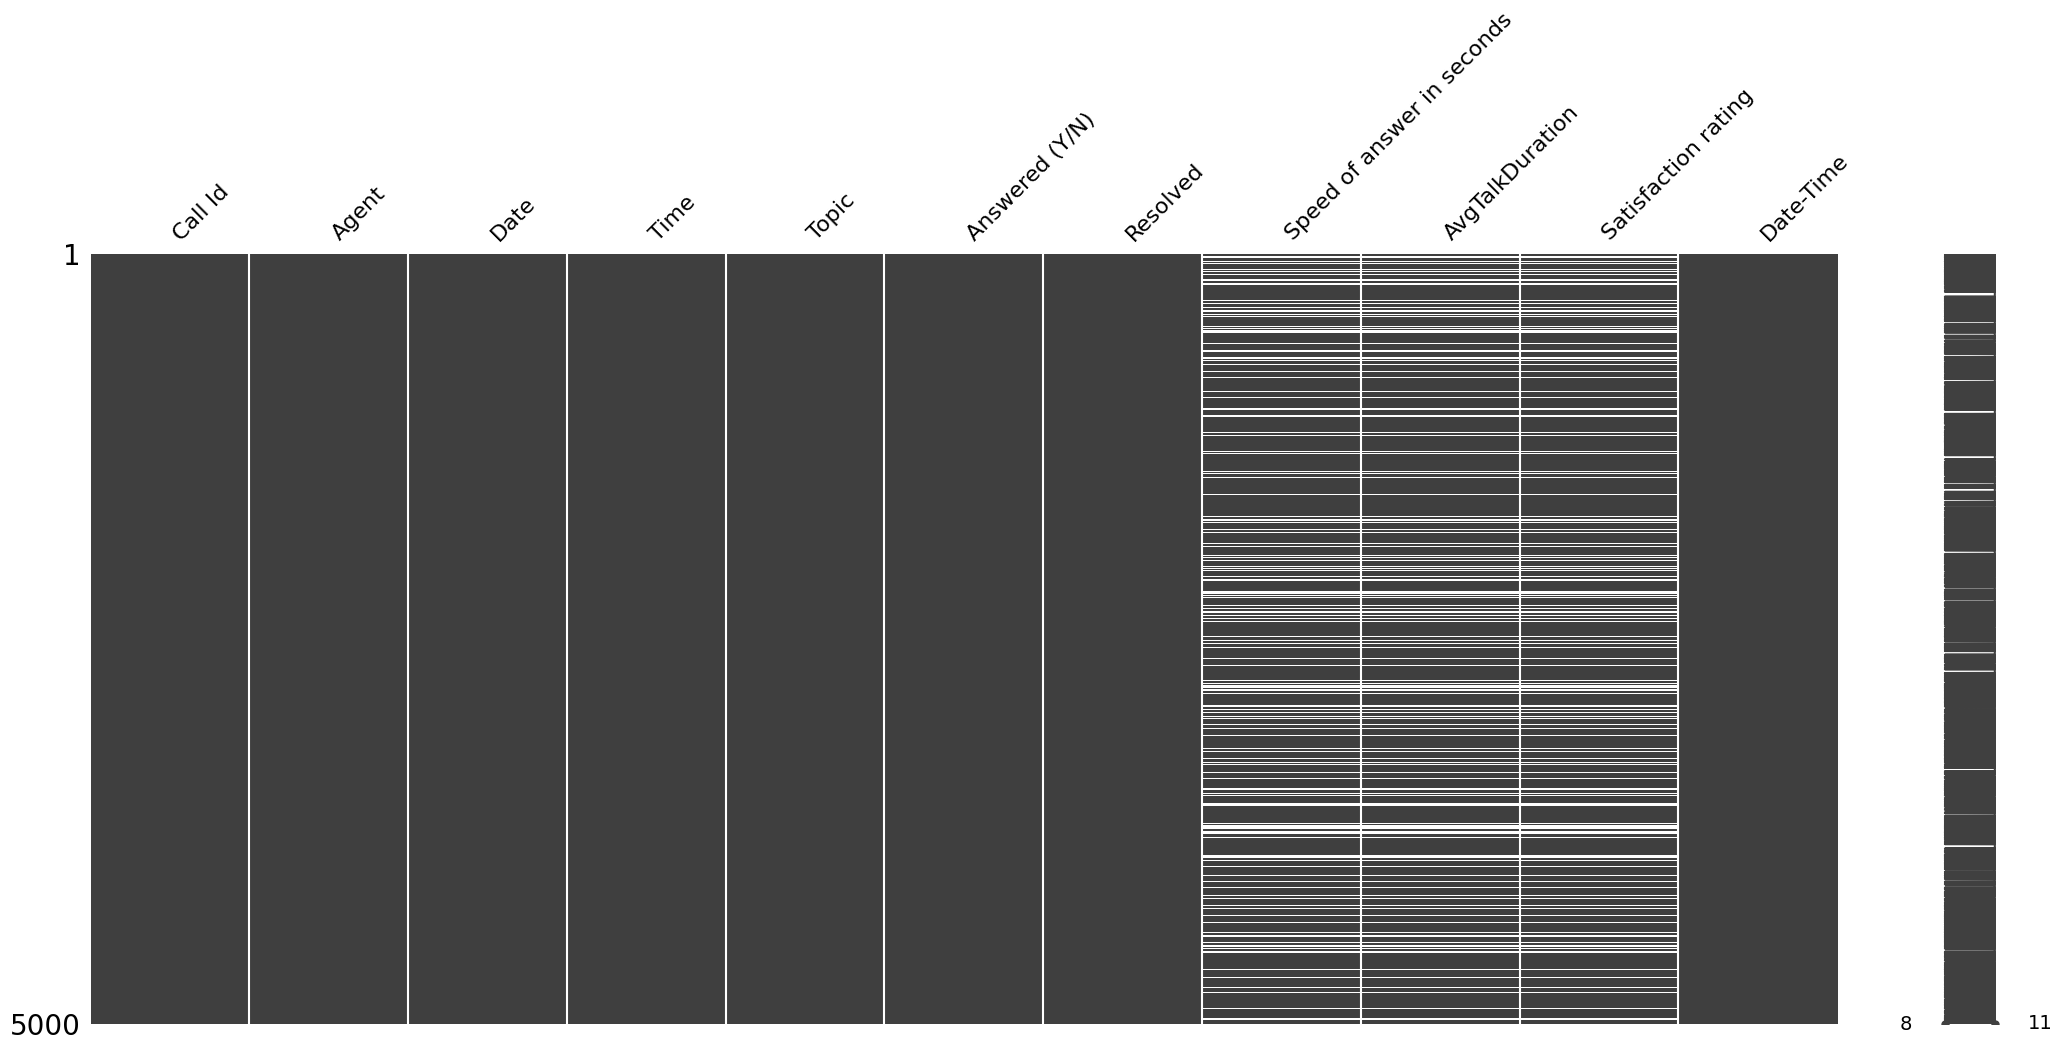

In [320]:
import missingno

missingno.matrix(df);

In [321]:
# !! Answer Me!! Which rows correspond to missing (NaN) speed of answer?
df.loc[df['AvgTalkDuration'].isna()]['Answered (Y/N)'].value_counts()

,count
Answered (Y/N),
N,946


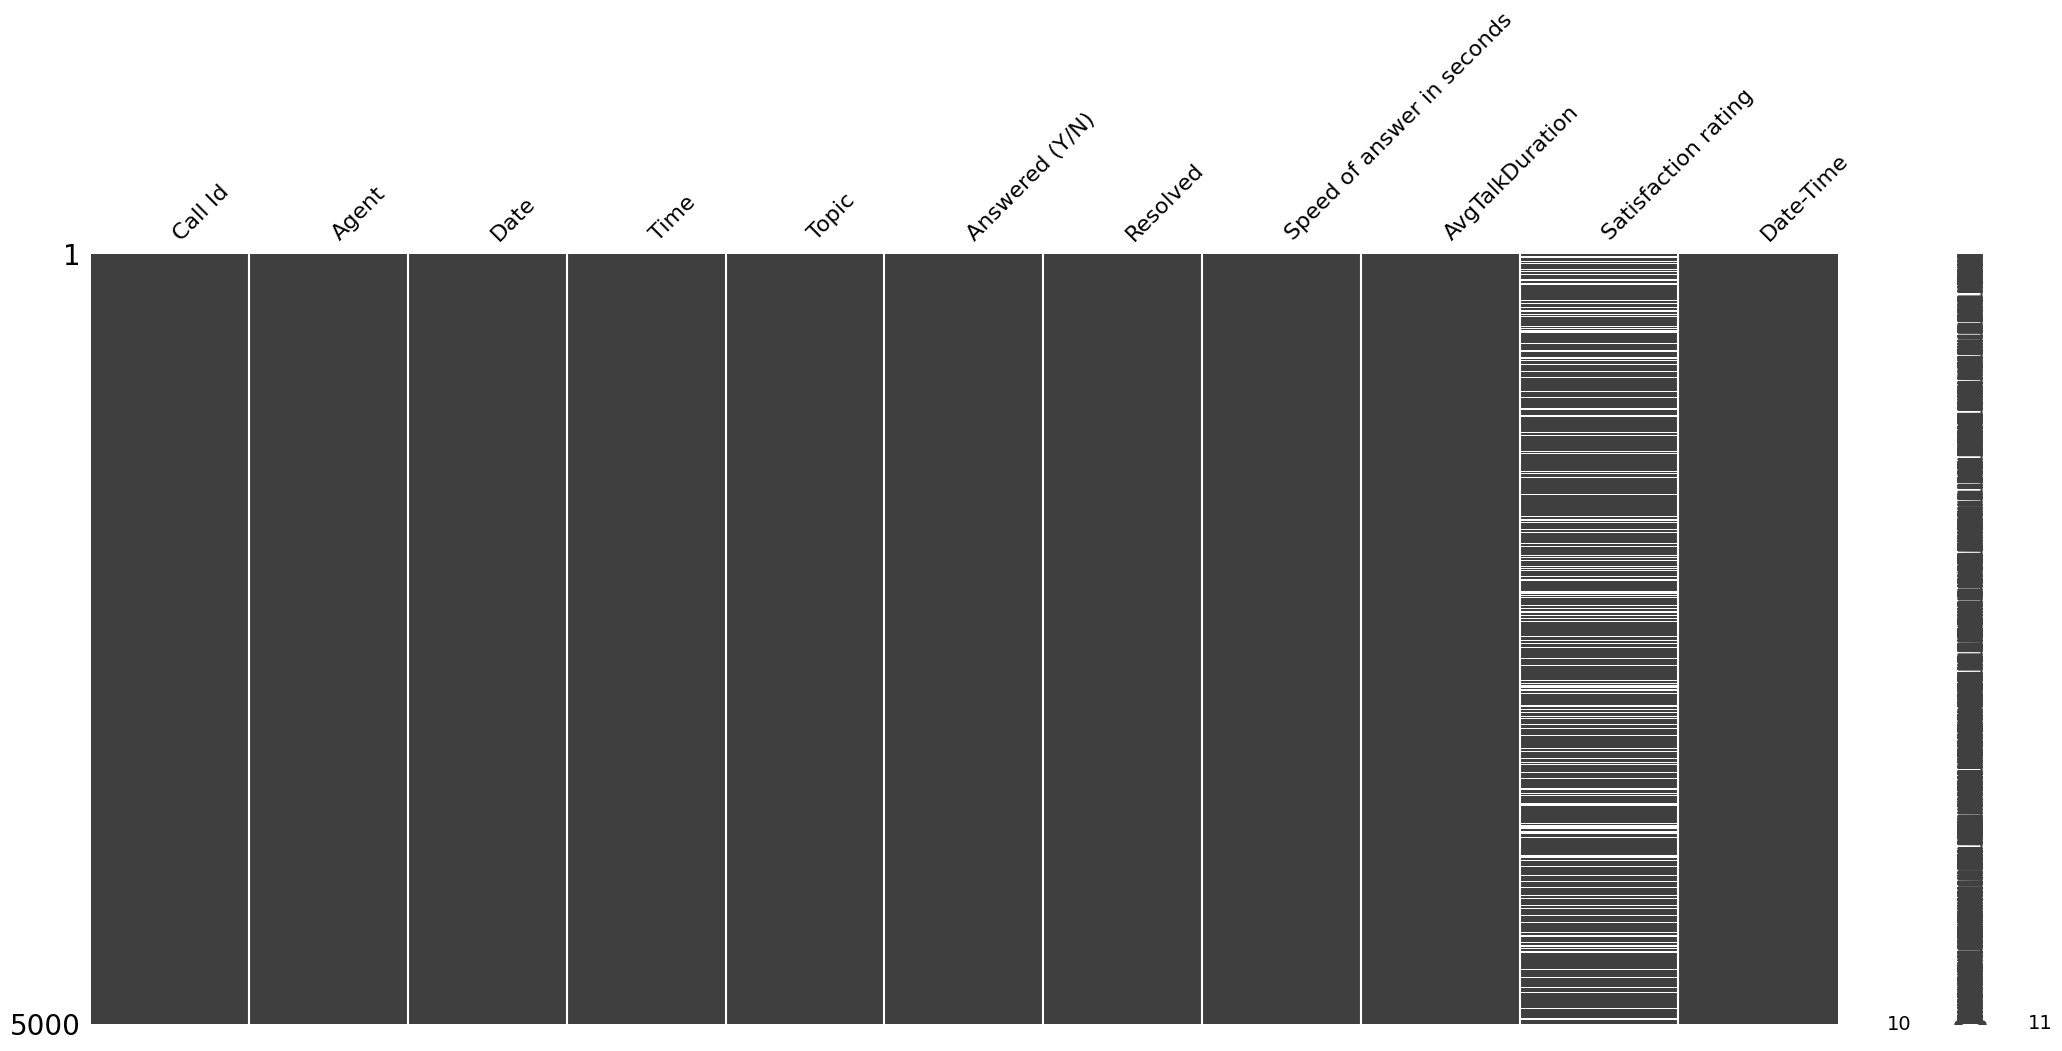

In [322]:
# changing NaN to appropriate values
df['Speed of answer in seconds'] = df['Speed of answer in seconds'].fillna(0)
df['AvgTalkDuration'] = df['AvgTalkDuration'].fillna(0)

missingno.matrix(df);

**Question:** Does it make sense also to set missing Satisfaction ratings to 0?

Now, going back to the dataframe we now have 3 meaningful performance metrics to look into (Speed of answer, AvgTalkDuration, and Satisfaction rating). But it's also a good analysis to look into the number of calls answered and resolved by the agent to get a sense of their performance. However, the values corresponding to these columns are in Y/N format. What we want is to quantify this better.

In [323]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Date-Time
0,ID0001,Diane,2021-01-01,09:12:58,Complaint,Y,Y,109.0,143.0,3.0,2021-01-01 09:12:58
1,ID0002,Becky,2021-01-01,09:12:58,Appointment,Y,N,70.0,242.0,3.0,2021-01-01 09:12:58
2,ID0003,Stewart,2021-01-01,09:47:31,Complaint,Y,Y,10.0,131.0,3.0,2021-01-01 09:47:31
3,ID0004,Greg,2021-01-01,09:47:31,Complaint,Y,Y,53.0,37.0,2.0,2021-01-01 09:47:31
4,ID0005,Becky,2021-01-01,10:00:29,Insurance or Billing,Y,Y,95.0,60.0,3.0,2021-01-01 10:00:29
...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Insurance or Billing,Y,Y,22.0,340.0,1.0,2021-03-31 16:37:55
4996,ID4997,Diane,2021-03-31,16:45:07,Insurance or Billing,Y,Y,100.0,196.0,3.0,2021-03-31 16:45:07
4997,ID4998,Diane,2021-03-31,16:53:46,Insurance or Billing,Y,Y,84.0,109.0,4.0,2021-03-31 16:53:46
4998,ID4999,Jim,2021-03-31,17:02:24,Medical Consultation,Y,Y,98.0,58.0,5.0,2021-03-31 17:02:24


In [324]:
# reconstruct answered calls to compute for answer rate
df['Answered'] = [1 if df.loc[i, 'Answered (Y/N)'] == "Y" else 0 for i in range(len(df))]
df['Not Answered'] = [1 if df.loc[i, 'Answered (Y/N)'] == "N" else 0 for i in range(len(df))]


# !! Answer Me !! Can you reconstruct resolved calls to compute for resolution rate
df['Resolved (Y/N)'] = df['Resolved']
df['Resolved'] = [1 if df.loc[i, 'Resolved (Y/N)'] == "Y" else 0 for i in range(len(df))]
df['Not Resolved'] = [1 if df.loc[i, 'Resolved (Y/N)'] == "N" else 0 for i in range(len(df))]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   object        
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   int64         
 7   Speed of answer in seconds  5000 non-null   float64       
 8   AvgTalkDuration             5000 non-null   float64       
 9   Satisfaction rating         4054 non-null   float64       
 10  Date-Time                   5000 non-null   datetime64[ns]
 11  Answered                    5000 non-null   int64         
 1

Let's now remove unnecessary columns and keep all important ones in our analysis later.

In [325]:
# removing unnecessary columns
df.drop(columns=['Call Id', 'Date', 'Time', 'Answered (Y/N)', 'Resolved (Y/N)'], inplace=True)

## Creating Data Fields for Analyses and More Data Preparation

Now that we have prepared the data and applied all necessary cleaning and preprocessing technique, we're now going to create some data fields and pivot tables that will give us in-depth analysis of our dataset.

Things that we'll look into:
1. Agent performance across different **time fields** (hourly, daily, weekly,
monthly)
  - number of calls handled
  - average talk duration
  - average speed of answer
  - average satisfation rating
  - answer rate
  - resolution rate
2. Overall performance of the Healthcare Company
  - same metrics as above
  - topics concerned vs resolution

In [326]:
# creating time fields using dt.strftime

df['Hour'] = df['Date-Time'].dt.strftime('%-H').astype(int)

df['Weekday'] = df['Date-Time'].dt.strftime('%a')

df['Week'] = df['Date-Time'].dt.strftime('%-U').astype(int) + 1  # sunday as first day of week

df['Month'] = df['Date-Time'].dt.strftime('%b')

In [48]:
df

,Agent,Topic,Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Date-Time,Answered,Not Answered,Not Resolved,Hour,Weekday,Week,Month
0,Diane,Complaint,1,109.0,143.0,3.0,2021-01-01 09:12:58,1,0,0,9,Fri,1,Jan
1,Becky,Appointment,0,70.0,242.0,3.0,2021-01-01 09:12:58,1,0,1,9,Fri,1,Jan
2,Stewart,Complaint,1,10.0,131.0,3.0,2021-01-01 09:47:31,1,0,0,9,Fri,1,Jan
3,Greg,Complaint,1,53.0,37.0,2.0,2021-01-01 09:47:31,1,0,0,9,Fri,1,Jan
4,Becky,Insurance or Billing,1,95.0,60.0,3.0,2021-01-01 10:00:29,1,0,0,10,Fri,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jim,Insurance or Billing,1,22.0,340.0,1.0,2021-03-31 16:37:55,1,0,0,16,Wed,14,Mar
4996,Diane,Insurance or Billing,1,100.0,196.0,3.0,2021-03-31 16:45:07,1,0,0,16,Wed,14,Mar
4997,Diane,Insurance or Billing,1,84.0,109.0,4.0,2021-03-31 16:53:46,1,0,0,16,Wed,14,Mar
4998,Jim,Medical Consultation,1,98.0,58.0,5.0,2021-03-31 17:02:24,1,0,0,17,Wed,14,Mar


In [327]:
# remove unnecessary columns and rearrange kept ones
df = df.loc[:, ['Agent', 'Hour', 'Weekday', 'Week', 'Month',
                'Topic', 'Answered', 'Not Answered', 'Resolved', 'Not Resolved',
                'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating']]

df

,Agent,Hour,Weekday,Week,Month,Topic,Answered,Not Answered,Resolved,Not Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,Diane,9,Fri,1,Jan,Complaint,1,0,1,0,109.0,143.0,3.0
1,Becky,9,Fri,1,Jan,Appointment,1,0,0,1,70.0,242.0,3.0
2,Stewart,9,Fri,1,Jan,Complaint,1,0,1,0,10.0,131.0,3.0
3,Greg,9,Fri,1,Jan,Complaint,1,0,1,0,53.0,37.0,2.0
4,Becky,10,Fri,1,Jan,Insurance or Billing,1,0,1,0,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jim,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,22.0,340.0,1.0
4996,Diane,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,100.0,196.0,3.0
4997,Diane,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,84.0,109.0,4.0
4998,Jim,17,Wed,14,Mar,Medical Consultation,1,0,1,0,98.0,58.0,5.0


In [50]:
# !! Answer Me !! Create a variable for the metrics
metrics = df.columns[6:]

metrics

Index(['Answered', 'Not Answered', 'Resolved', 'Not Resolved',
       'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating'],
      dtype='object')

## Agent-level Analytics

Consider a scenario where team managers (TMs) want to determine how well their agents are performing. They want to focus on analyzing their performance using different metrics across various time fields.

For this, you from the analytics team is tasked to develop a system that will cater their needs. What the TMs need is an easy command where they can filter the agent names, set the time field, and view the result as a table of the metrics.

How do you think you can do this in Python, specifically pandas? What you need are pivot tables and functions.

### Creating Table Aggregations using Pivot Tables

In [212]:
# agent options: 'Diane', 'Becky', 'Stewart', 'Greg', 'Jim', 'Joe', 'Martha', 'Dan', None
# time_field options: Hour, Weekday, Week, Month, None

def agent_performance(agents:list=None, time_field:str=None, descr:bool=True):

  # captures case where time_field is for Overall
  index = ['Agent', time_field] if time_field else ['Agent']

  # create pivot table
  df_pivot = df.pivot_table(
      index=index,
      aggfunc={
          'Answered': 'sum',
          'Not Answered': 'sum',
          'Resolved': 'sum',
          'Not Resolved': 'sum',
          'AvgTalkDuration': 'mean',
          'Speed of answer in seconds': 'mean',
          'Satisfaction rating': 'mean'
      }
  )

  # rearrange time_field
  if time_field == 'Weekday':
    df_pivot = df_pivot.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], level=time_field)

  if time_field == 'Month':
    df_pivot = df_pivot.reindex(['Jan', 'Feb', 'Mar'], level=time_field)

  # set agent as a new column
  if time_field:
    df_pivot = df_pivot.reset_index(time_field)

  df_pivot['Answer rate'] = df_pivot['Answered'] / (df_pivot['Answered'] + df_pivot['Not Answered'])
  df_pivot['Resolve rate'] = df_pivot['Resolved'] / (df_pivot['Resolved'] + df_pivot['Not Resolved'])

  # df_pivot = df_pivot.loc[:, headers]

  if agents:
    # filter agents
    df_pivot = df_pivot.loc[agents]


  # setting title/description
  if descr:
    if time_field:
      print(f"Agent Performance by {time_field}")
    else:
      print(f'Overall Agent Performance')

  return df_pivot


# call the function
agent_performance(agents='Becky', time_field='Month')

Agent Performance by Month


,Month,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Answer rate,Resolve rate
Agent,,,,,,,,,,
Becky,Jan,179,180.550926,37,60,156,3.384181,52.731481,0.828704,0.722222
Becky,Feb,161,190.283019,51,66,146,3.305882,54.278302,0.759434,0.688679
Becky,Mar,165,169.487685,38,54,149,3.423529,53.591133,0.812808,0.733990


In [164]:
agent_performance(agents='Martha', time_field='Month')

Agent Performance by Month


,Month,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Answer rate,Resolve rate
Agent,,,,,,,,,,
Martha,Jan,176,175.522727,44,65,155,3.543860,55.540909,0.800000,0.704545
Martha,Feb,160,181.502370,51,72,139,3.452381,51.545024,0.758294,0.658768
Martha,Mar,172,183.975845,35,46,161,3.417143,60.975845,0.830918,0.777778


### Aggregations and Visualizations

While the tables we generate above gives us full picture of our aggregations numerically, it's still difficult to gain insights out of them in just one glance. For this, we create some visualizations on the aggregations we generated.


If you read this, stand up and shout "Python!". First person to do so gets a prize :)

#### Overall

In [165]:
# create an overall aggregation of agent performance
df_agent = agent_performance(agents=None, time_field=None, descr=False)

df_agent.head()

,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Answer rate,Resolve rate
Agent,,,,,,,,,
Becky,505,180.261490,126,180,451,3.371373,53.527734,0.800317,0.714739
Dan,533,191.014218,100,150,483,3.447419,55.590837,0.842022,0.763033
Diane,509,173.295419,124,180,453,3.405190,52.448657,0.804107,0.715640
Greg,508,182.459936,116,164,460,3.404382,55.062500,0.814103,0.737179
Jim,539,183.587087,127,178,488,3.393657,53.393393,0.809309,0.732733


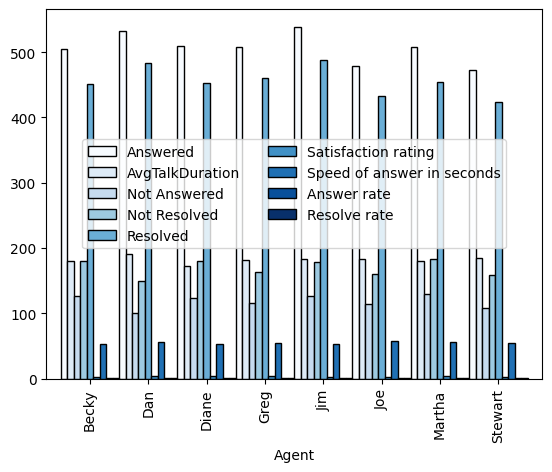

In [172]:
# plot barchart of overall agent performance (combined metrics)
df_agent.plot(kind='bar', stacked=False,
              width=1, edgecolor='black', cmap='Blues', legend=True)
plt.xlabel('Agent')

plt.legend(loc='center', ncol=2)
# plt.ylim([0, 2500])
plt.show()

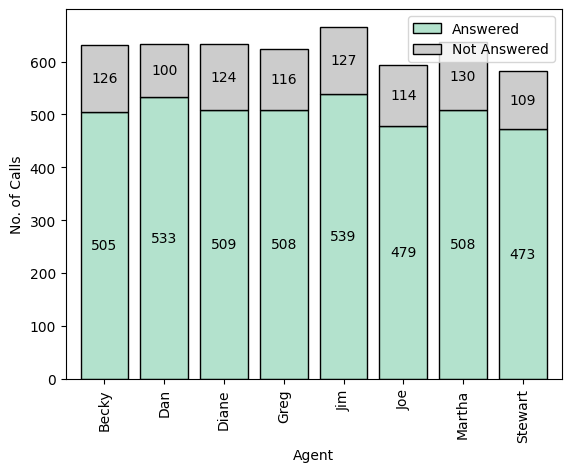

In [335]:
# plot bar chart
ax = df_agent.plot(kind='bar', y=['Answered', 'Not Answered'],
              stacked=True, cmap='Pastel2',
              width=0.8, edgecolor='black', legend=True)

# add text to stacked bar chart
for containers in ax.containers:
    ax.bar_label(containers, fmt='%.0f', label_type='center')

ax.set_ylabel('No. of Calls')
plt.show()

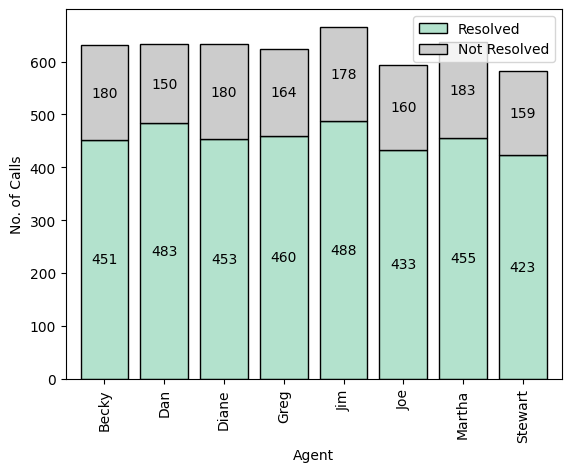

In [336]:
# !! Answer Me!! Can you the same plot as above but comparing Resolved and Unresolved Calls?
ax = df_agent.plot(kind='bar', y=['Resolved', 'Not Resolved'],
              stacked=True, cmap='Pastel2',
              width=0.8, edgecolor='black', legend=True)

# # add text to stacked bar chart
for containers in ax.containers:
    ax.bar_label(containers, fmt='%.0f', label_type='center')

ax.set_ylabel('No. of Calls')
plt.show()

#### Multi-Index Aggregations

Plotting pivot tables aggregated by more than 1 column is a little different.

In [223]:
df_agent_month = agent_performance(agents=None, time_field='Month', descr=False)

df_agent_month

,Month,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Answer rate,Resolve rate
Agent,,,,,,,,,,
Becky,Jan,179,180.550926,37,60,156,3.384181,52.731481,0.828704,0.722222
Becky,Feb,161,190.283019,51,66,146,3.305882,54.278302,0.759434,0.688679
Becky,Mar,165,169.487685,38,54,149,3.423529,53.591133,0.812808,0.733990
Dan,Jan,193,198.709251,34,49,178,3.489474,56.039648,0.850220,0.784141
Dan,Feb,174,184.233333,36,51,159,3.523529,53.457143,0.828571,0.757143
Dan,Mar,166,189.367347,30,50,146,3.319018,57.357143,0.846939,0.744898
Diane,Jan,186,184.076577,36,54,168,3.427027,53.279279,0.837838,0.756757
Diane,Feb,164,167.842365,39,58,145,3.369427,53.561576,0.807882,0.714286
Diane,Mar,159,167.110577,49,68,140,3.415094,50.475962,0.764423,0.673077


In [224]:
# pulling data for one agent only
df_agent_month.loc['Stewart', ['Month', 'AvgTalkDuration']]

,Month,AvgTalkDuration
Agent,,
Stewart,Jan,176.786957
Stewart,Feb,185.196429
Stewart,Mar,196.336957


In [225]:
# !! Answer Me !! Create a pivot table of agent-level metrics by week
df_agent_week = agent_performance(agents=None, time_field='Week', descr=False)
df_agent_week.head(15)

,Week,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Answer rate,Resolve rate
Agent,,,,,,,,,,
Becky,1,15,161.470588,2,4,13,3.266667,69.352941,0.882353,0.764706
Becky,2,31,206.055556,5,11,25,3.344828,54.722222,0.861111,0.694444
Becky,3,47,171.456140,10,14,43,3.395833,52.947368,0.824561,0.754386
Becky,4,38,161.478261,8,15,31,3.388889,50.195652,0.826087,0.673913
Becky,5,41,188.846154,11,15,37,3.341463,47.192308,0.788462,0.711538
Becky,6,44,201.566038,9,13,40,3.416667,58.301887,0.830189,0.754717
Becky,7,38,182.773585,15,17,36,3.769231,50.773585,0.716981,0.679245
Becky,8,40,209.865385,12,15,37,3.209302,59.346154,0.769231,0.711538
Becky,9,39,169.000000,15,19,35,3.000000,47.074074,0.722222,0.648148


In [226]:
# !! Answer Me!! From the week-level dataframe, how can we pull data for one agent only?
df_agent_week.loc['Dan', ['Week', 'AvgTalkDuration']]

,Week,AvgTalkDuration
Agent,,
Dan,1,250.428571
Dan,2,171.890909
Dan,3,201.363636
Dan,4,151.777778
Dan,5,231.136364
Dan,6,173.543860
Dan,7,194.811321
Dan,8,173.925926
Dan,9,197.372549


Now that we know how to pull data per agent for a pivot table aggregated with some time field, we can then create a chart for each individual agent as follows.


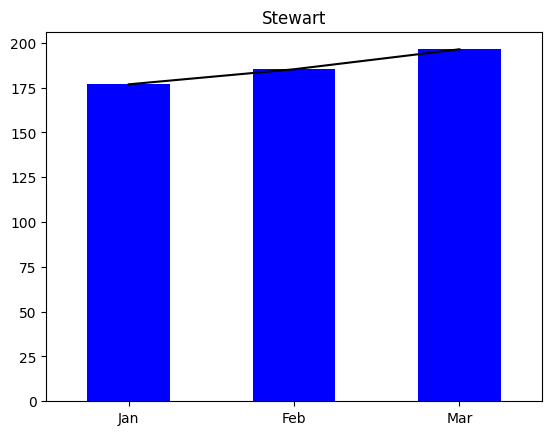

In [257]:
name = 'Stewart'
ax = df_agent_month.loc[name, 'AvgTalkDuration'].reset_index(drop=True).plot(kind='bar',
                                                                 color='blue', legend=False)
df_agent_month.loc[name, 'AvgTalkDuration'].reset_index(drop=True).plot(kind='line', ax=ax,
                                                                 color='black', legend=False)

ax.set_xticks(np.arange(len(df_agent_month['Month'].unique())), df_agent_month['Month'].unique())

ax.set_title(f"{name}")
plt.show()

Suppose that a TM wants to see this kind of plot in one report together. We can combine them together using `plt.subplots`.

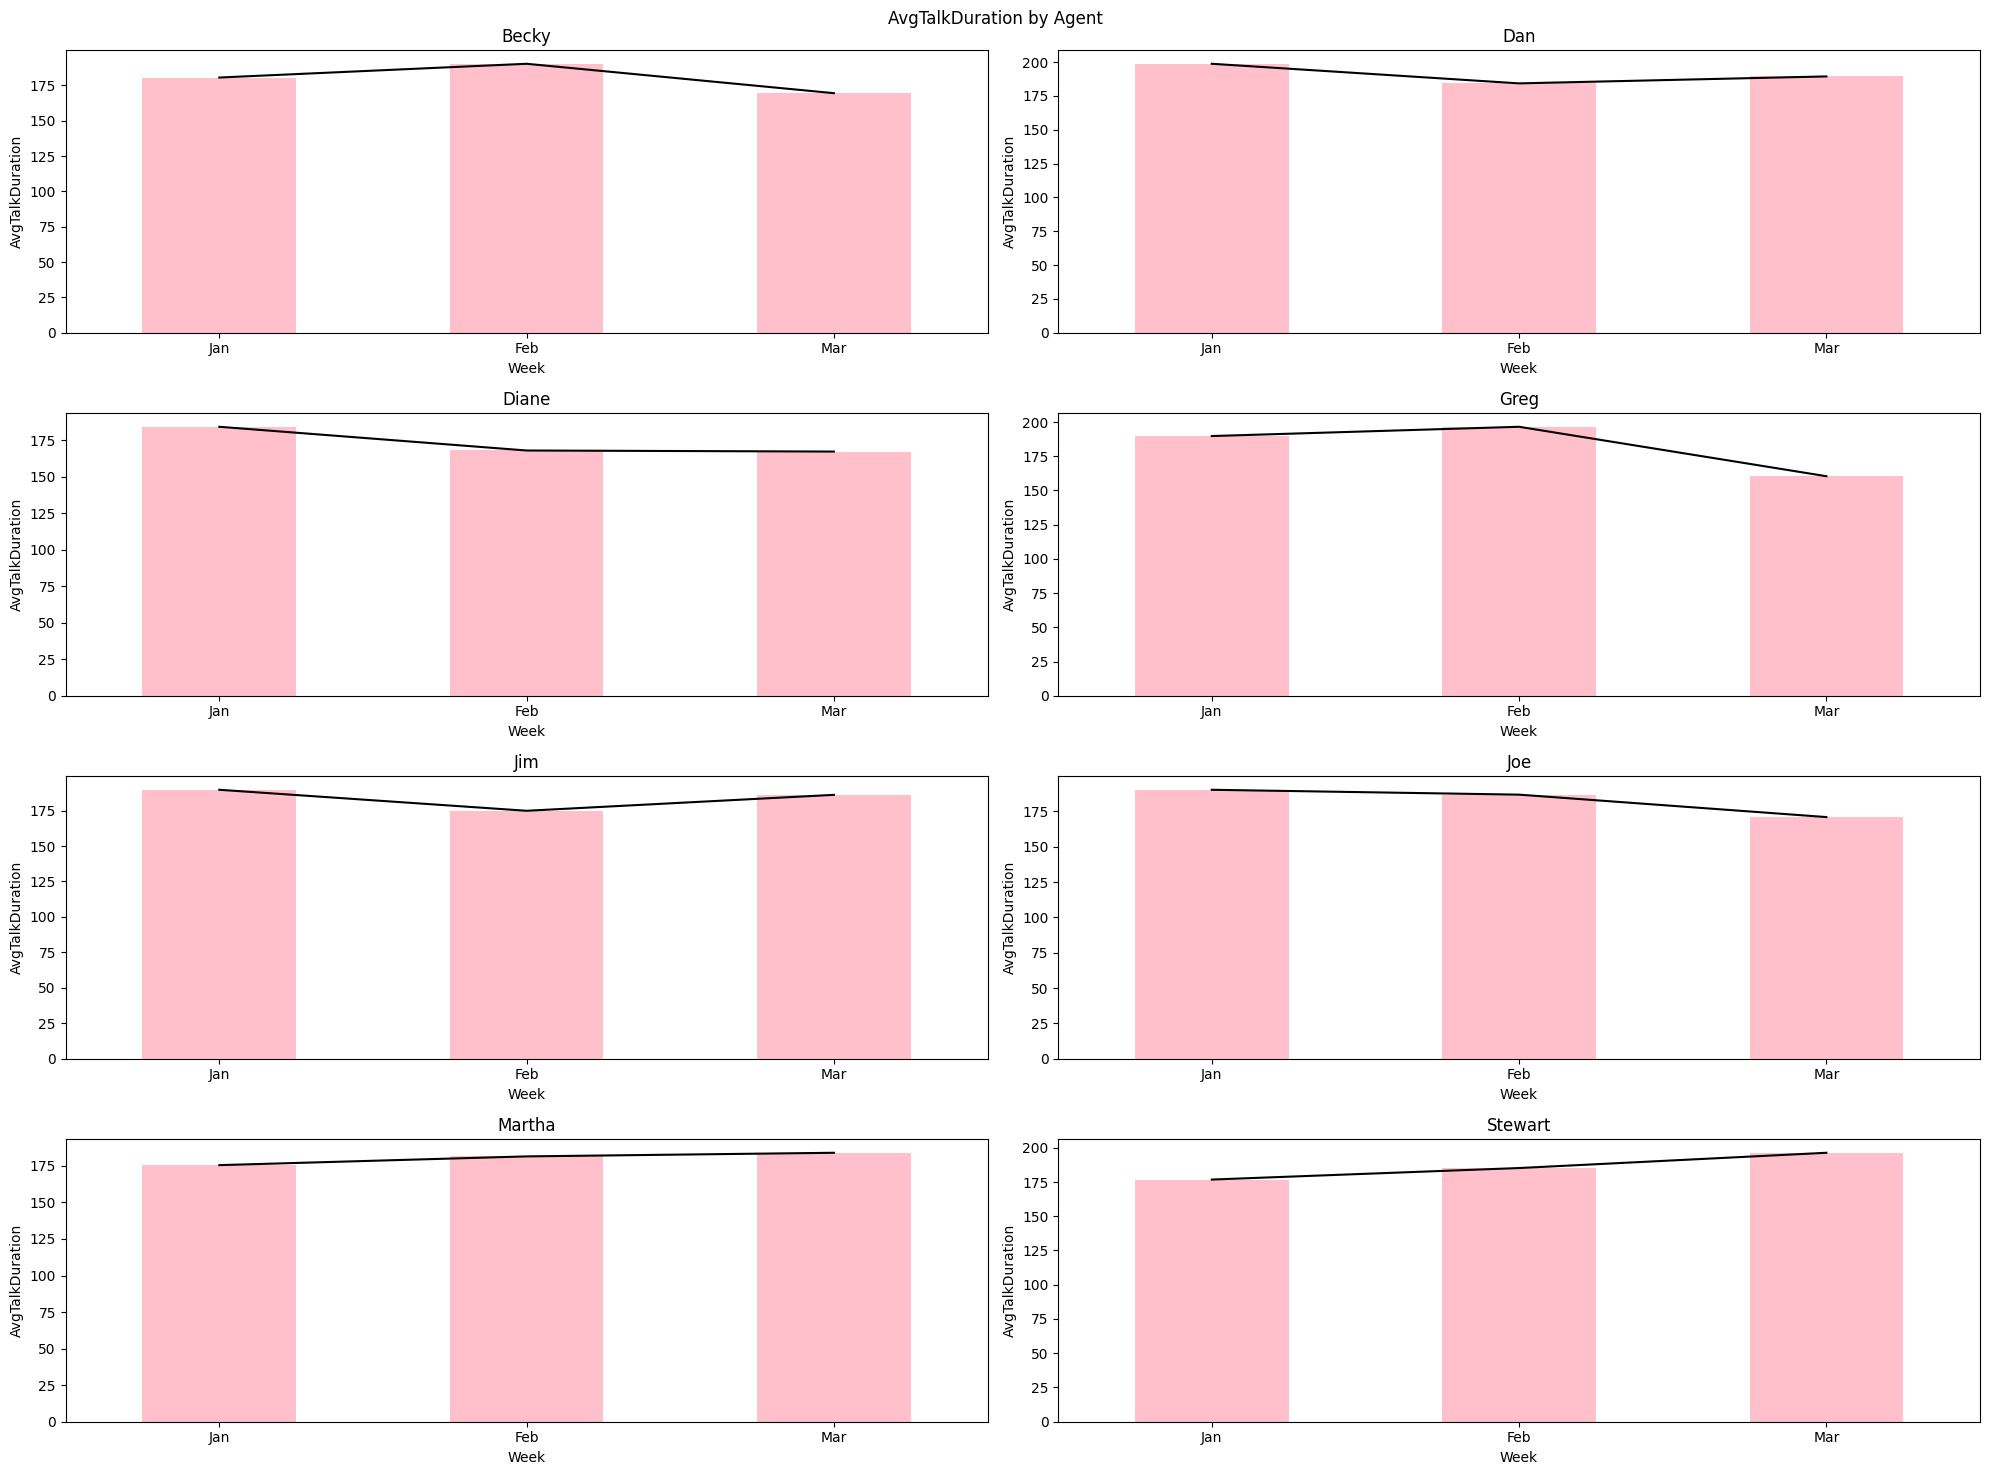

In [258]:
names = df_agent_month.index.unique()
met = 'AvgTalkDuration'

fig, axs = plt.subplots(4,2, figsize=(20, 15))
axs = axs.flatten()

for i in range(len(axs)):
  df_agent_month.loc[names[i], [met]].reset_index(drop=True).plot(kind='line', ax=axs[i],
                                                                 color='black', legend=False)

  df_agent_month.loc[names[i], [met]].reset_index(drop=True).plot(kind='bar', ax=axs[i],
                                                                 color='pink', legend=False)
  axs[i].set_title(names[i])
  # axs[i].set_ylim([0,5])
  axs[i].set_xlabel('Week')
  axs[i].set_ylabel(met)
  axs[i].set_xticks(np.arange(len(df_agent_month['Month'].unique())), df_agent_month['Month'].unique(), rotation=0)


plt.suptitle(f'{met} by Agent')
plt.tight_layout()
plt.show()

Now, suppose that the team leaders want to analyze the performance of their agents on the weekday level comparison. Particularly, they'd want to look into who among the agents are not performing well in terms of calls answered and concerns resolved.

To provide this insight, implement a similar process to the monthly/weekly analysis above. But this time, use both the *Not Answered* and *Not Resolved* as the metrics of comparison.


**Suggestion:** Try to use an area chart to visualize this.

In [261]:
# !! Answer Me !! Create the same aggregation for the weekday
df_agent_weekday = agent_performance(agents=None, time_field='Weekday', descr=False)

df_agent_weekday.head(10)

,Weekday,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Answer rate,Resolve rate
Agent,,,,,,,,,,
Becky,Mon,83,154.203540,30,37,76,3.558140,54.601770,0.734513,0.672566
Becky,Tue,63,200.936709,16,26,53,3.279412,50.341772,0.797468,0.670886
Becky,Wed,58,179.140845,13,19,52,3.350000,57.098592,0.816901,0.732394
Becky,Thu,61,170.276316,15,18,58,3.306452,55.223684,0.802632,0.763158
Becky,Fri,78,191.851064,16,26,68,3.376623,48.925532,0.829787,0.723404
Becky,Sat,89,186.601852,19,29,79,3.355556,52.898148,0.824074,0.731481
Becky,Sun,73,184.433333,17,25,65,3.324324,56.288889,0.811111,0.722222
Dan,Mon,83,193.708333,13,26,70,3.432099,59.854167,0.864583,0.729167
Dan,Tue,77,178.348315,12,16,73,3.459459,57.842697,0.865169,0.820225


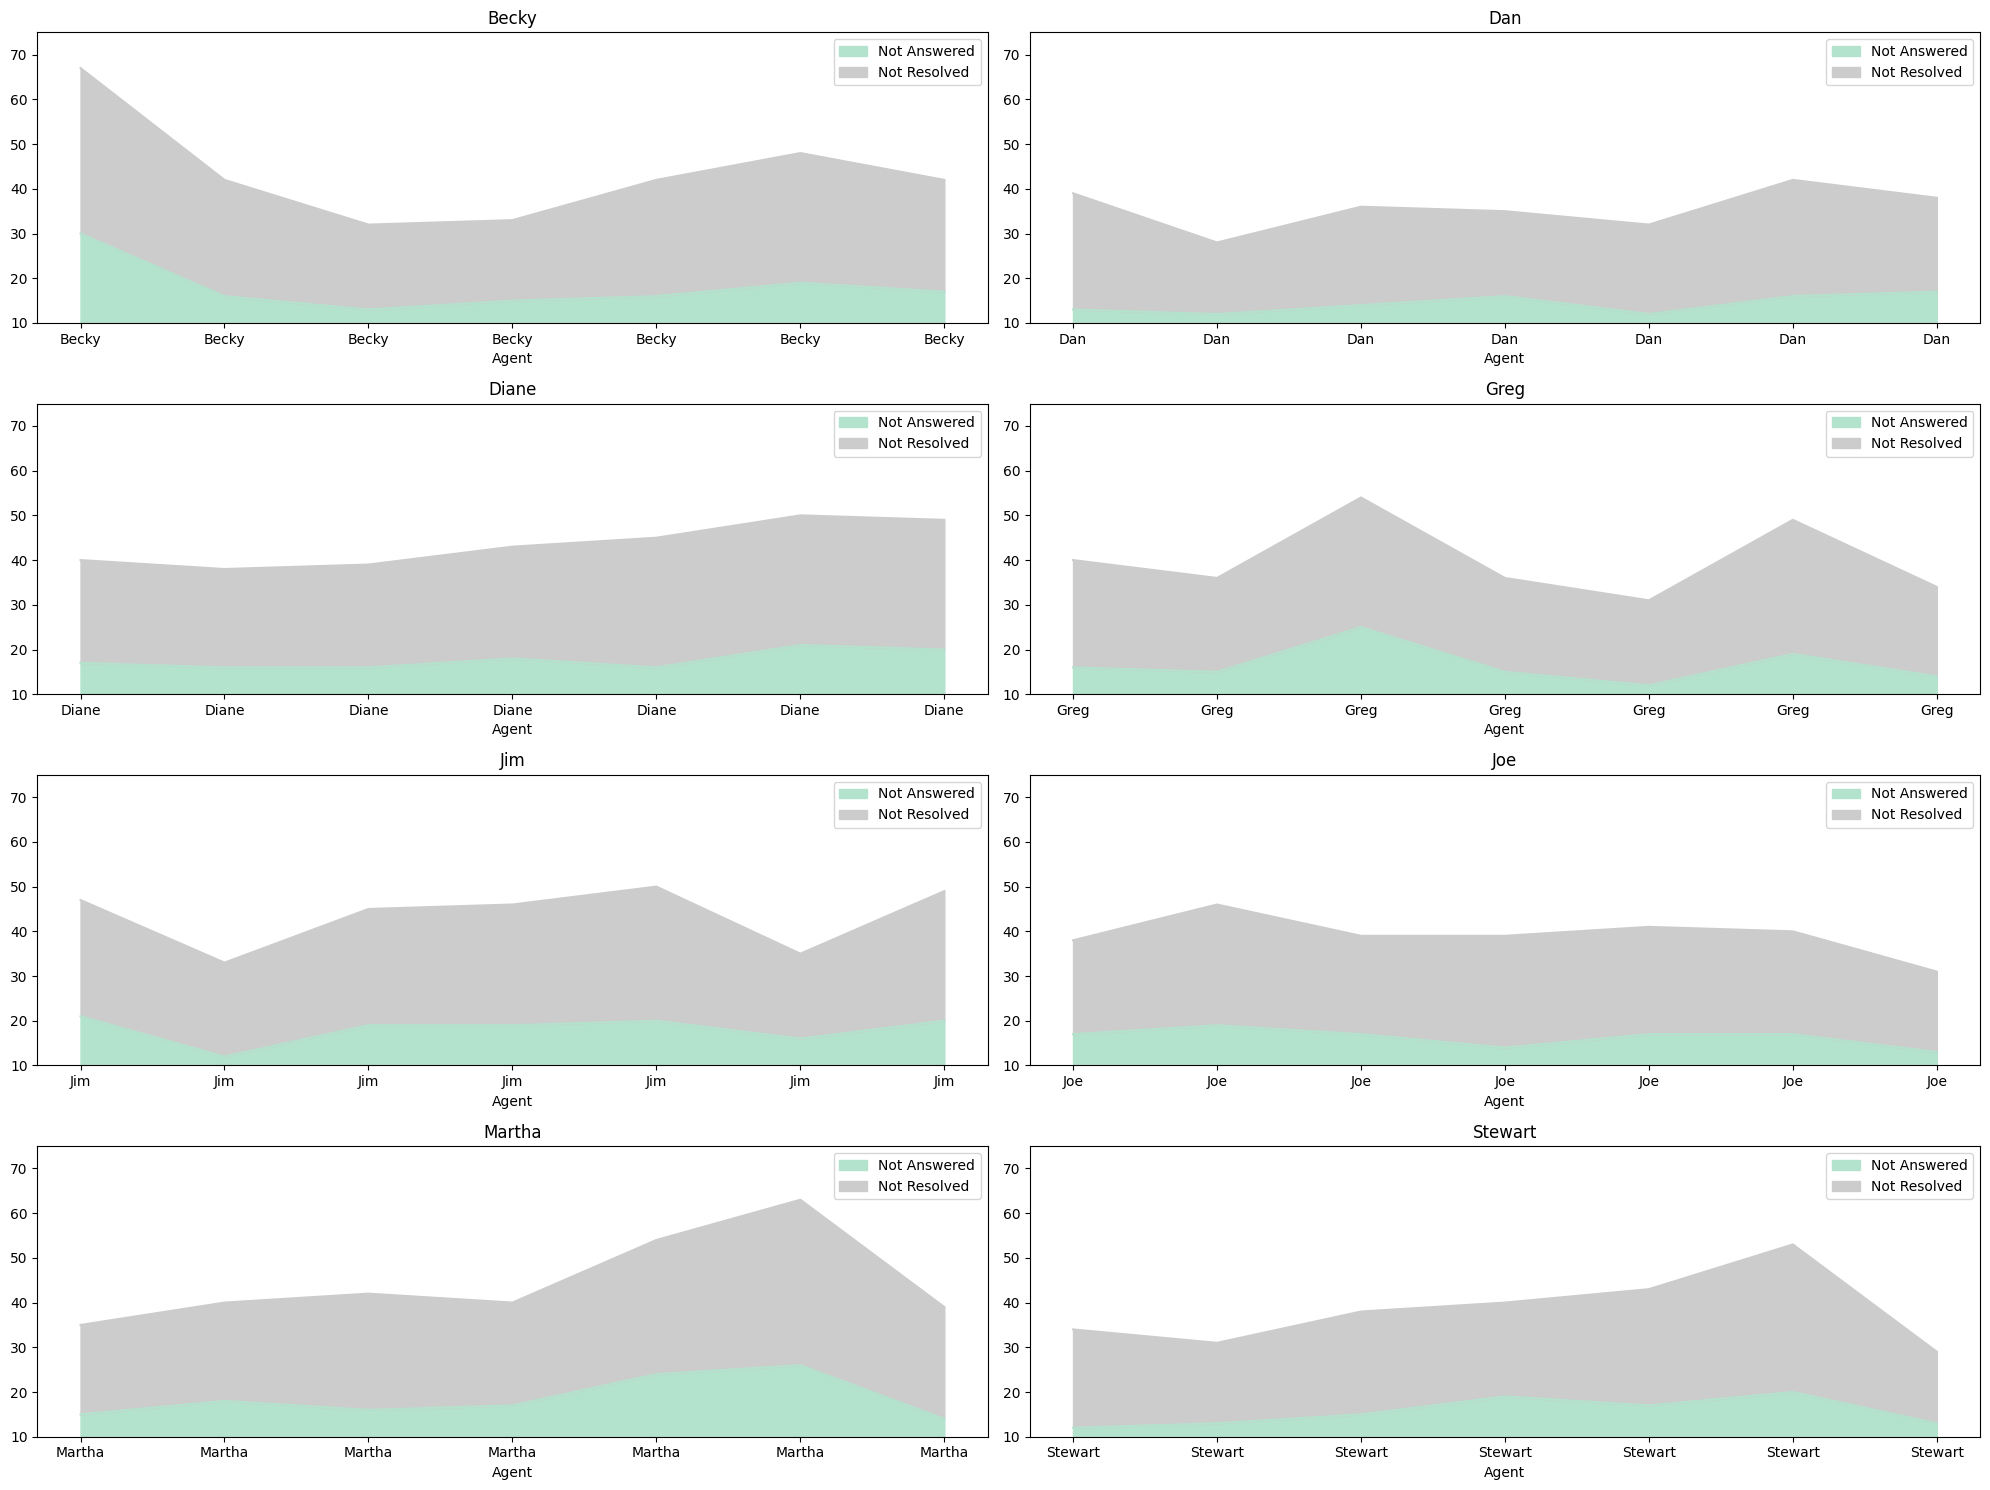

In [267]:
names = df_agent_weekday.index.unique()
met = ['Not Answered', 'Not Resolved']

fig, axs = plt.subplots(4,2, figsize=(20, 15))
axs = axs.flatten()

for i in range(len(axs)):
  df_agent_weekday.loc[names[i], met].plot(kind='area', ax=axs[i], cmap='Pastel2',
                                           legend=True)

  axs[i].set_title(names[i])
  axs[i].set_ylim([10,75])
  axs[i].legend(loc='upper right')


# plt.suptitle('Average Talk Duration by Agent')
plt.tight_layout()
plt.show()

## Company-level Analytics

Now, suppose we want to look the overall picture of our dataset to construct more senior-level decisions. For this, we'll still be creating pivot tables but this time, only pivoting on time fields.


Some questions we'd like to answer:
1. What topic is usually the concern for the call? Which of these topics is usually unresolved?
2. Is there a specific time window where more calls are being unanswered/unresolved? Does satisfaction drop during these time?
3. What contributes to higher satisfaction?

In [268]:
metrics

Index(['Answered', 'Not Answered', 'Resolved', 'Not Resolved',
       'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating'],
      dtype='object')

### Topic Concern

*1. What topic is usually the concern for the call? Which of these topics is usually unresolved?*

To answer the first question we create a pivot table aggregated by topic and create a column for the total number of calls.

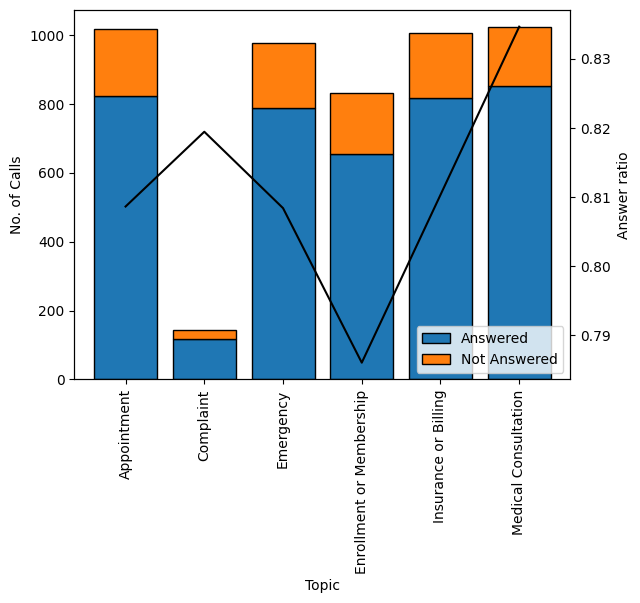

In [282]:
df_topic = df.pivot_table(
    index='Topic',
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_topic['Answer ratio'] = df_topic['Answered'] / (df_topic['Answered'] + df_topic['Not Answered'])

ax = df_topic.plot(kind='bar', y=['Answered', 'Not Answered'], stacked=True, width=0.8, edgecolor='black', legend=True)

df_topic.plot(kind='line', y='Answer ratio', secondary_y=True, color='black', ax=ax, legend=True)


ax.right_ax.set_ylabel('Answer ratio')
ax.set_ylabel('No. of Calls')
ax.set_xticks(np.arange(len(df_topic.index)), df_topic.index, rotation=90)
ax.legend(loc='lower right')
plt.show()

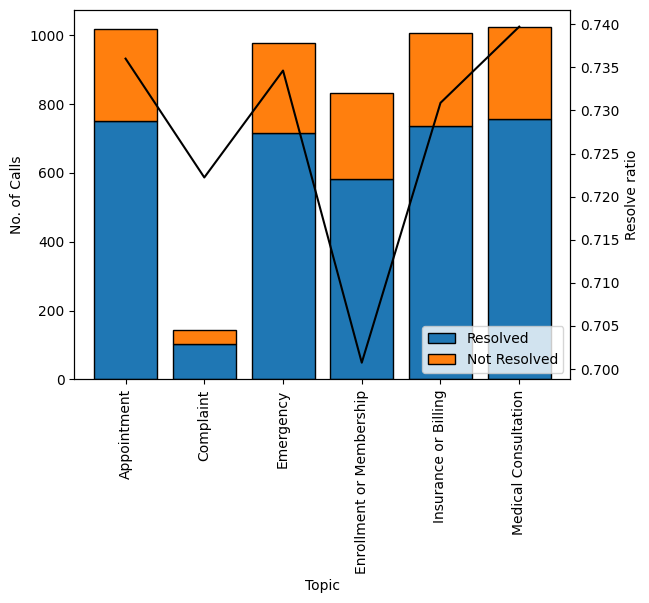

In [285]:
# !! Try Me !! Create the same plot but for Resolved vs Not Resolved
# !! Answer Me !! Which of the following topics is usually unresolved?

df_topic['Resolve ratio'] = df_topic['Resolved'] / (df_topic['Resolved'] + df_topic['Not Resolved'])

ax = df_topic.plot(kind='bar', y=['Resolved', 'Not Resolved'], stacked=True, width=0.8, edgecolor='black', legend=True)

df_topic.plot(kind='line', y='Resolve ratio', secondary_y=True, color='black', ax=ax, legend=True)


ax.right_ax.set_ylabel('Resolve ratio')
ax.set_ylabel('No. of Calls')
ax.set_xticks(np.arange(len(df_topic.index)), df_topic.index, rotation=90)
ax.legend(loc='lower right')
plt.show()

### Hourly Answer and Resolution Rate

*2. Is there a specific time window where more calls are being unanswered/unresolved? Does satisfaction drop during these times?*

To answer the second question we create a pivot table aggregated by hour and create columns for the unanswer and unresolved ratio. We compare this correspondingly with the average satisfaction.

In [286]:
df_hour = df.pivot_table(
    index='Hour',
    values=metrics,
    aggfunc={
        'Answered': 'sum',
        'Not Answered': 'sum',
        'Resolved': 'sum',
        'Not Resolved': 'sum',
        'AvgTalkDuration': 'mean',
        'Speed of answer in seconds': 'mean',
        'Satisfaction rating': 'mean'
    }
)

df_hour['Unanswer Ratio'] = df_hour['Not Answered'] / (df_hour['Answered'] + df_hour['Not Answered'])
df_hour['Unresolved Ratio'] = df_hour['Not Resolved'] / (df_hour['Resolved'] + df_hour['Not Resolved'])

df_hour

,Answered,AvgTalkDuration,Not Answered,Not Resolved,Resolved,Satisfaction rating,Speed of answer in seconds,Unanswer Ratio,Unresolved Ratio
Hour,,,,,,,,,
9,436,176.363803,111,154,393,3.536697,51.683729,0.202925,0.281536
10,432,188.688091,97,129,400,3.462963,58.045369,0.183365,0.243856
11,481,180.828814,109,156,434,3.426195,55.286441,0.184746,0.264407
12,431,180.775137,116,156,391,3.371230,53.127971,0.212066,0.285192
13,484,177.267677,110,159,435,3.392562,55.166667,0.185185,0.267677
14,406,185.202405,93,141,358,3.266010,55.064128,0.186373,0.282565
15,435,181.337100,96,139,392,3.367816,54.615819,0.180791,0.261770
16,462,187.314488,104,159,407,3.426407,55.742049,0.183746,0.280919
17,475,182.627787,108,158,425,3.368421,54.142367,0.185249,0.271012


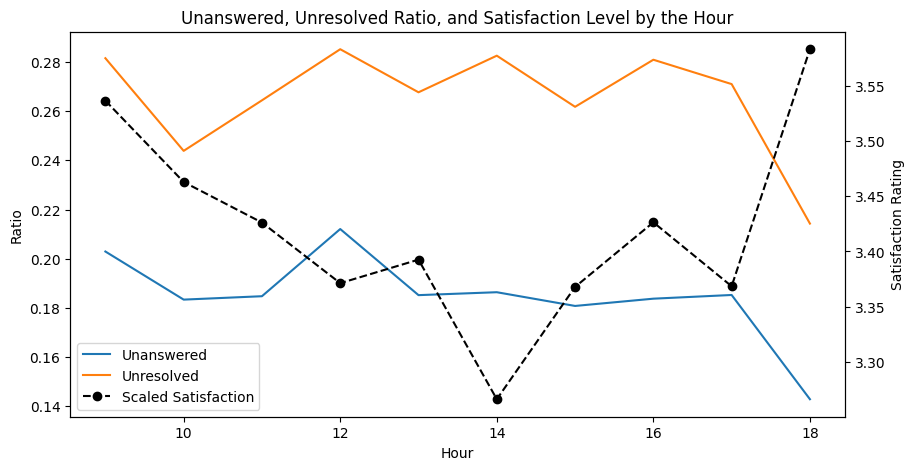

In [310]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

unanswer_line, = ax.plot(df_hour.index, df_hour['Unanswer Ratio'], label='Unanswered')
unresolved_line, = ax.plot(df_hour.index, df_hour['Unresolved Ratio'], label='Unresolved')

# right y-axis
ax1 = ax.twinx()
satisfaction_line, = ax1.plot(df_hour.index, df_hour['Satisfaction rating'], 'ko--',label='Scaled Satisfaction')

ax.set_xlabel('Hour')
ax.set_ylabel('Ratio')
ax1.set_ylabel('Satisfaction Rating')

plt.title('Unanswered, Unresolved Ratio, and Satisfaction Level by the Hour')

# grouping legend
lines = [unanswer_line, unresolved_line, satisfaction_line]
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best')
plt.show()

### Satisfaction Drivers
*3. What contributes to higher satisfaction?*

Finally, to answer the third question, we create a correlation heatmap and a corresponding scatter plot on the entire dataset, not aggregated by any field.

In [328]:
df

,Agent,Hour,Weekday,Week,Month,Topic,Answered,Not Answered,Resolved,Not Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,Diane,9,Fri,1,Jan,Complaint,1,0,1,0,109.0,143.0,3.0
1,Becky,9,Fri,1,Jan,Appointment,1,0,0,1,70.0,242.0,3.0
2,Stewart,9,Fri,1,Jan,Complaint,1,0,1,0,10.0,131.0,3.0
3,Greg,9,Fri,1,Jan,Complaint,1,0,1,0,53.0,37.0,2.0
4,Becky,10,Fri,1,Jan,Insurance or Billing,1,0,1,0,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jim,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,22.0,340.0,1.0
4996,Diane,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,100.0,196.0,3.0
4997,Diane,16,Wed,14,Mar,Insurance or Billing,1,0,1,0,84.0,109.0,4.0
4998,Jim,17,Wed,14,Mar,Medical Consultation,1,0,1,0,98.0,58.0,5.0


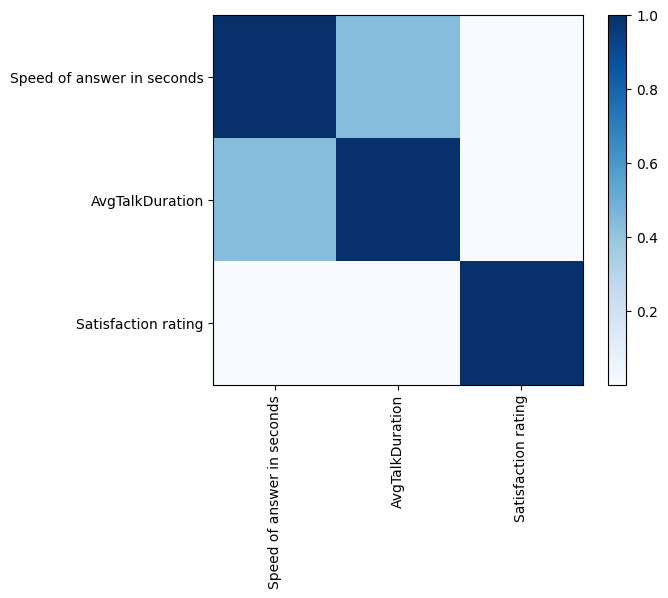

In [337]:
plt.imshow(df.iloc[:, -3:].corr(), cmap='Blues')

# change the x- and y-tick labels
plt.xticks(range(len(metrics[-3:])), metrics[-3:], rotation=90)
plt.yticks(range(len(metrics[-3:])), metrics[-3:])
plt.colorbar()  # add a colorbar
plt.show()

From this correlation heatmap, it seems that there are no metrics that correspond well with the satisfaction rating.

## Future Directions

The analyses we implemented above reflect how insights can be generated using plots from proper aggregations, depending on the questions focused. We also showed how a recurring process of pulling data can somehow be automated using the right approach.

In the next meetings, our objective is to explore more advanced analytics methods where we introduce various techniques, their applicability, and use. Additionally, we aim to create an automation out of these systems that will aid us in creating reporting solutions on a certain cadence.